# STAT 301 Methods and Results


### <font color=red> Online News Popularity

# Methods and Results

## Exploratory Data Analysis (EDA)

In [1]:
library(tidyverse)
library(repr)
library(readxl)
library(infer)
library(cowplot)
library(GGally)
library(broom)
library(dplyr)
library(car)
library(tidymodels)
library(glmnet)
library(leaps)
library(faraway)
library(mltools)
library(caret)
library(forcats)
library(gridExtra)
library(patchwork)
library(scales)
library(utils)
library(httr)
library(Hmisc)
library(psych)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ dials        1

In [2]:
ONP_raw <- read.csv('https://raw.githubusercontent.com/jasonllai/Stat-301-project-t36/main/OnlineNewsPopularity.csv', header = TRUE, sep = ",")
head(ONP_raw)

url                                                            timedelta
1 http://mashable.com/2013/01/07/amazon-instant-video-browser/   731      
2 http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/    731      
3 http://mashable.com/2013/01/07/apple-40-billion-app-downloads/ 731      
4 http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/       731      
5 http://mashable.com/2013/01/07/att-u-verse-apps/               731      
6 http://mashable.com/2013/01/07/beewi-smart-toys/               731      
  n_tokens_title n_tokens_content n_unique_tokens n_non_stop_words
1 12              219             0.6635945       1               
2  9              255             0.6047431       1               
3  9              211             0.5751295       1               
4  9              531             0.5037879       1               
5 13             1072             0.4156456       1               
6 10              370             0.5598886       1               
  n_non_stop_unique_tokens num_hrefs num_self_hrefs num_imgs ⋯
1 0.8153846                 4         2              1       ⋯
2 0.7919463                 3         1              1       ⋯
3 0.6638655                 3         1              1       ⋯
4 0.6656347                 9         0              1       ⋯
5 0.5408895                19        19             20       ⋯
6 0.6981982                 2         2              0       ⋯
  min_positive_polarity max_positive_polarity avg_negative_polarity
1 0.10000000            0.7                   -0.3500000           
2 0.03333333            0.7                   -0.1187500           
3 0.10000000            1.0                   -0.4666667           
4 0.13636364            0.8                   -0.3696970           
5 0.03333333            1.0                   -0.2201923           
6 0.13636364            0.6                   -0.1950000           
  min_negative_polarity max_negative_polarity title_subjectivity
1 -0.600                -0.2000000            0.5000000         
2 -0.125                -0.1000000            0.0000000         
3 -0.800                -0.1333333            0.0000000         
4 -0.600                -0.1666667            0.0000000         
5 -0.500                -0.0500000            0.4545455         
6 -0.400                -0.1000000            0.6428571         
  title_sentiment_polarity abs_title_subjectivity abs_title_sentiment_polarity
1 -0.1875000               0.00000000             0.1875000                   
2  0.0000000               0.50000000             0.0000000                   
3  0.0000000               0.50000000             0.0000000                   
4  0.0000000               0.50000000             0.0000000                   
5  0.1363636               0.04545455             0.1363636                   
6  0.2142857               0.14285714             0.2142857                   
  shares
1  593  
2  711  
3 1500  
4 1200  
5  505  
6  855

*Table 2.1 First 6 rows of raw data*

In [3]:
# Select variables of interest
news_data <- ONP_raw %>%
  select(3,4,8,10,12,28,57,45,46,47,48,51,54,58,61)

head(news_data)

n_tokens_title n_tokens_content num_hrefs num_imgs average_token_length
1 12              219              4         1       4.680365            
2  9              255              3         1       4.913725            
3  9              211              3         1       4.393365            
4  9              531              9         1       4.404896            
5 13             1072             19        20       4.682836            
6 10              370              2         0       4.359459            
  kw_avg_avg title_subjectivity global_subjectivity global_sentiment_polarity
1 0          0.5000000          0.5216171           0.09256198               
2 0          0.0000000          0.3412458           0.14894781               
3 0          0.0000000          0.7022222           0.32333333               
4 0          0.0000000          0.4298497           0.10070467               
5 0          0.4545455          0.5135021           0.28100348               
6 0          0.6428571          0.4374086           0.07118419               
  global_rate_positive_words global_rate_negative_words avg_positive_polarity
1 0.04566210                 0.013698630                0.3786364            
2 0.04313725                 0.015686275                0.2869146            
3 0.05687204                 0.009478673                0.4958333            
4 0.04143126                 0.020715631                0.3859652            
5 0.07462687                 0.012126866                0.4111274            
6 0.02972973                 0.027027027                0.3506100            
  avg_negative_polarity title_sentiment_polarity shares
1 -0.3500000            -0.1875000                593  
2 -0.1187500             0.0000000                711  
3 -0.4666667             0.0000000               1500  
4 -0.3696970             0.0000000               1200  
5 -0.2201923             0.1363636                505  
6 -0.1950000             0.2142857                855

*Table 2.2 First 6 rows of data interested*

#### Description of the variables being used:

1. `n_tokens_title` (type numeric `dbl`) -> Number of words in the title
2. `n_tokens_content` (type numeric `dbl`) -> Number of words in the content
3. `num_hrefs` (type numeric `dbl`) -> Number of links in the article.
4. `num_imgs` (type numeric `dbl`) ->(type numeric `dbl`) Number of images
5. `average_token_length` (type numeric `dbl`) -> Average length of the words in the content
6. `kw_avg_avg` (type numeric `dbl`) -> Average number of shares (popularity) of the average keyword included in the article. (PS: keywords are like hashtags)

7. `title_subjectivity` (type numeric `dbl`) -> Title subjectivity
8. `global_subjectivity` (type numeric `dbl`) -> Text subjectivity
9. `global_sentiment_polarity` (type numeric `dbl`) -> Text sentiment polarity

10. `global_rate_positive_words` (type numeric `dbl`) -> Rate of positive words in the content
11. `global_rate_negative_words` (type numeric `dbl`) -> Rate of negative words in the content

12. `avg_positive_polarity` (type numeric `dbl`) -> Avg. polarity of positive words
13. `avg_negative_polarity` (type numeric `dbl`) -> Avg. polarity of negative  words

14. `title_sentiment_polarity` (type numeric `dbl`) -> Title sentiment polarity

19. **`shares`** (type numeric `int`) -> **Number of shares, indicating the overall popularity** **[RESPONSE VARIABLE]**
    
    
    
<span style="color: red;">Note: For both number of shares of the keywords and positive/negative polarities, although the original dataset contained variables for the minimums and maximums as well, we used the average values for these features to get a better overall effect.</span>

### Research question:
How can we build an effective model to predict the number of shares an article gets based on the following variables: number of words in the title (`n_tokens_title`), number of images (`num_imgs`), number of words in content (`n_tokens_content`), number of links (`num_hrefs`), average length of words in the content (`average_token_length`), title subjectivity (`title_subjectivity`), global subjectivity (`global_subjectivity`), global sentiment polarity (`global_sentiment_polarity`), rate of positive words (`rate_positive_words`), rate of negative words (`rate_negative_words`), negative polarity (`avg_negative_polarity`), positive polarity (`avg_positive_polarity`), title sentiment polarity (`title_sentiment_polarity`), and average keywords (`kw_avg_avg`)?

### Clean and Wrangle

#### Integer Values

Seems that some of our variables are integer values (counts) which inherently makes sense since they can't carry values with decimals (such as number of images, words, links, etc.)

We will check which variables need transformation and which not by applying `sapply()` 

In [4]:
# Assuming df is your data frame
result <- sapply(news_data, function(x) all(x == floor(x)))
                 
# Convert integer columns
for (col in names(news_data)) {
    if (result[col]) {
        news_data[[col]] <- as.integer(news_data[[col]])
    }
}              
str(news_data)

'data.frame':	39644 obs. of  15 variables:
 $ n_tokens_title            : int  12 9 9 9 13 10 8 12 11 10 ...
 $ n_tokens_content          : int  219 255 211 531 1072 370 960 989 97 231 ...
 $ num_hrefs                 : int  4 3 3 9 19 2 21 20 2 4 ...
 $ num_imgs                  : int  1 1 1 1 20 0 20 20 0 1 ...
 $ average_token_length      : num  4.68 4.91 4.39 4.4 4.68 ...
 $ kw_avg_avg                : num  0 0 0 0 0 0 0 0 0 0 ...
 $ title_subjectivity        : num  0.5 0 0 0 0.455 ...
 $ global_subjectivity       : num  0.522 0.341 0.702 0.43 0.514 ...
 $ global_sentiment_polarity : num  0.0926 0.1489 0.3233 0.1007 0.281 ...
 $ global_rate_positive_words: num  0.0457 0.0431 0.0569 0.0414 0.0746 ...
 $ global_rate_negative_words: num  0.0137 0.01569 0.00948 0.02072 0.01213 ...
 $ avg_positive_polarity     : num  0.379 0.287 0.496 0.386 0.411 ...
 $ avg_negative_polarity     : num  -0.35 -0.119 -0.467 -0.37 -0.22 ...
 $ title_sentiment_polarity  : num  -0.188 0 0 0 0.136 ...
 $ shar

In [5]:
# Readable column names
news_data <- news_data %>%
    rename(n_words_title = n_tokens_title,
           n_words_content = n_tokens_content,
           n_links = num_hrefs,
           n_images = num_imgs,
           avg_word_length = average_token_length,
           avg_keyword_popularity = kw_avg_avg,
           subjectivity_title = title_subjectivity,
           subjectivity_text = global_subjectivity,
           sentiment_polarity_text = global_sentiment_polarity,
           sentiment_polarity_title = title_sentiment_polarity,
           rate_positive_words_text = global_rate_positive_words,
           rate_negative_words_text = global_rate_negative_words,
           avg_positive_polarity = avg_positive_polarity,
           avg_negative_polarity = avg_negative_polarity
          ) %>%
    mutate(shares = as.integer(shares))
str(news_data)

'data.frame':	39644 obs. of  15 variables:
 $ n_words_title           : int  12 9 9 9 13 10 8 12 11 10 ...
 $ n_words_content         : int  219 255 211 531 1072 370 960 989 97 231 ...
 $ n_links                 : int  4 3 3 9 19 2 21 20 2 4 ...
 $ n_images                : int  1 1 1 1 20 0 20 20 0 1 ...
 $ avg_word_length         : num  4.68 4.91 4.39 4.4 4.68 ...
 $ avg_keyword_popularity  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ subjectivity_title      : num  0.5 0 0 0 0.455 ...
 $ subjectivity_text       : num  0.522 0.341 0.702 0.43 0.514 ...
 $ sentiment_polarity_text : num  0.0926 0.1489 0.3233 0.1007 0.281 ...
 $ rate_positive_words_text: num  0.0457 0.0431 0.0569 0.0414 0.0746 ...
 $ rate_negative_words_text: num  0.0137 0.01569 0.00948 0.02072 0.01213 ...
 $ avg_positive_polarity   : num  0.379 0.287 0.496 0.386 0.411 ...
 $ avg_negative_polarity   : num  -0.35 -0.119 -0.467 -0.37 -0.22 ...
 $ sentiment_polarity_title: num  -0.188 0 0 0 0.136 ...
 $ shares                  : int  5

Now all the count variables are converted to integer data types as needed.

### Explanatory Visualization

#### Basic Summary Statistics

We will start by exploring the surface level characteristics of the data such as the variable types, number of rows, columns and check if the dataset contains any missing (NA) values.

We will then use the `describe()` function to explore the basic summary statistics including measures of central tendency and measures of dispersion. This will give us a good grasp on where the center of the variables are located and how spread out the values are within those variables.

In [6]:
dims <- dim(news_data)
rows <- dims[1]
columns <- dims[2]

cat("\nDimensions and missing values:\n")
# Dimensions and NA check
if (sum(is.na(news_data)) == 0){
    print(paste0("The dataset consists of ", as.character(rows), " observations and ",  as.character(columns), " variables (", 
                 as.character(columns-1), " + 1 response variable). There are no missing values in the dataset."))
}


Dimensions and missing values:
[1] "The dataset consists of 39644 observations and 15 variables (14 + 1 response variable). There are no missing values in the dataset."


In [7]:
cat("\nBasic summary statistics table - Measures of Central Tendency and Measures of Dispersion:\n")
description <- round(psych::describe(news_data), 2)

description$variance <- description$sd^2

round(description, 2)


Basic summary statistics table - Measures of Central Tendency and Measures of Dispersion:


vars n     mean    sd       median  trimmed mad   
n_words_title             1   39644   10.40     2.11   10.00   10.37   1.48
n_words_content           2   39644  546.51   471.11  409.00  473.10 298.00
n_links                   3   39644   10.88    11.33    8.00    8.93   5.93
n_images                  4   39644    4.54     8.31    1.00    2.66   1.48
avg_word_length           5   39644    4.55     0.84    4.66    4.67   0.28
avg_keyword_popularity    6   39644 3135.86  1318.15 2870.07 2987.38 848.69
subjectivity_title        7   39644    0.28     0.32    0.15    0.23   0.22
subjectivity_text         8   39644    0.44     0.12    0.45    0.45   0.08
sentiment_polarity_text   9   39644    0.12     0.10    0.12    0.12   0.09
rate_positive_words_text 10   39644    0.04     0.02    0.04    0.04   0.02
rate_negative_words_text 11   39644    0.02     0.01    0.02    0.02   0.01
avg_positive_polarity    12   39644    0.35     0.10    0.36    0.36   0.08
avg_negative_polarity    13   39644   -0.26     0.13   -0.25   -0.26   0.10
sentiment_polarity_title 14   39644    0.07     0.27    0.00    0.06   0.00
shares                   15   39644 3395.38 11626.95 1400.00 1888.84 889.56
                         min   max       range     skew  kurtosis se   
n_words_title             2.00     23.00     21.00  0.17    0.00   0.01
n_words_content           0.00   8474.00   8474.00  2.95   19.47   2.37
n_links                   0.00    304.00    304.00  4.01   35.50   0.06
n_images                  0.00    128.00    128.00  3.95   24.52   0.04
avg_word_length           0.00      8.04      8.04 -4.58   22.18   0.00
avg_keyword_popularity    0.00  43567.66  43567.66  5.76  100.57   6.62
subjectivity_title        0.00      1.00      1.00  0.82   -0.54   0.00
subjectivity_text         0.00      1.00      1.00 -1.37    4.61   0.00
sentiment_polarity_text  -0.39      0.73      1.12  0.11    1.51   0.00
rate_positive_words_text  0.00      0.16      0.16  0.32    1.02   0.00
rate_negative_words_text  0.00      0.18      0.18  1.49    6.97   0.00
avg_positive_polarity     0.00      1.00      1.00 -0.72    3.38   0.00
avg_negative_polarity    -1.00      0.00      1.00 -0.55    2.37   0.00
sentiment_polarity_title -1.00      1.00      2.00  0.40    3.23   0.00
shares                    1.00 843300.00 843299.00 33.96 1832.35  58.40
                         variance    
n_words_title                    4.45
n_words_content             221944.63
n_links                        128.37
n_images                        69.06
avg_word_length                  0.71
avg_keyword_popularity     1737519.42
subjectivity_title               0.10
subjectivity_text                0.01
sentiment_polarity_text          0.01
rate_positive_words_text         0.00
rate_negative_words_text         0.00
avg_positive_polarity            0.01
avg_negative_polarity            0.02
sentiment_polarity_title         0.07
shares                   135185966.30

*Table 2.3 Measures of Central Tendency and Measures of Dispersion*

#### Observations:
- Our response variable (`shares`) is highly skewed, with some very extreme values.  Altough they might not be input errors, we will filter out the extreme values since they inflate variance significantly and make visualization very difficult.

- In _**Poisson regression**_ it's crucial that the mean equals the variance for the count data. For some of the variables (especially the count variables), the variance is significantly greater than the mean.

This is called _overdispersion_ and it needs to be investigated further. This can be due to the excess of zeros in these data or the nature of count (`int`) data.  

Since some of the count variables can be true 0's, we will only remove the 0's from the `n_words_content` and `avg_word_length` variables. This is because we expect the articles we'll be using in the analysis to have at least some word content in them. We will check the articles with the `url` column in the original dataset. If they seem geniune we will keep the 0's, if not, we will remove them.

In [8]:
# Subset data of articles with suspicious word counts and their links
no_word_articles <- ONP_raw %>% filter(n_tokens_content == 0 | average_token_length == 0) %>% select(url, shares)
head(no_word_articles, 3)

url                                                                shares
1 http://mashable.com/2013/01/23/actual-facebook-graph-searches/     2500  
2 http://mashable.com/2013/01/23/fitness-gadget-gym-cost-comparison/ 1700  
3 http://mashable.com/2013/01/25/data-vs-nature-infographic/         4500

*Table 2.4 Subset data of articles with suspicious word counts and their links*

After analyzing some of the articles, we saw that they in fact do have words in them (words not equal to 0) and thus, their average word lengths are also not equal to 0. This calls for erroneous entry, and wil be removed from the data. We will also filter shares to below 20,000 shares. 

In [9]:
# Data entry errors removed
news_data <- news_data %>% filter(n_words_content != 0, avg_word_length != 0)

### Correlation Matrix

We will continue the EDA with a correlation matrix. 

This will help us have a better idea of both the correlations between variables and the correlation of each variable with the response variable `shares`. 

**NOTE:** We will only be displaying "notable" correlations that are above 0.5, any correlation below 0.5 will be assigned NA to highlight the notable correlations.

In [10]:
# Create correlation matrix
cor_matrix <- cor(news_data[,-1])
threshold <- 0.5

cor_matrix[abs(cor_matrix) < threshold] <- NA
round(cor_matrix, 2)

n_words_content n_links n_images avg_word_length
n_words_content           1              NA      NA       NA             
n_links                  NA               1      NA       NA             
n_images                 NA              NA       1       NA             
avg_word_length          NA              NA      NA        1             
avg_keyword_popularity   NA              NA      NA       NA             
subjectivity_title       NA              NA      NA       NA             
subjectivity_text        NA              NA      NA       NA             
sentiment_polarity_text  NA              NA      NA       NA             
rate_positive_words_text NA              NA      NA       NA             
rate_negative_words_text NA              NA      NA       NA             
avg_positive_polarity    NA              NA      NA       NA             
avg_negative_polarity    NA              NA      NA       NA             
sentiment_polarity_title NA              NA      NA       NA             
shares                   NA              NA      NA       NA             
                         avg_keyword_popularity subjectivity_title
n_words_content          NA                     NA                
n_links                  NA                     NA                
n_images                 NA                     NA                
avg_word_length          NA                     NA                
avg_keyword_popularity    1                     NA                
subjectivity_title       NA                      1                
subjectivity_text        NA                     NA                
sentiment_polarity_text  NA                     NA                
rate_positive_words_text NA                     NA                
rate_negative_words_text NA                     NA                
avg_positive_polarity    NA                     NA                
avg_negative_polarity    NA                     NA                
sentiment_polarity_title NA                     NA                
shares                   NA                     NA                
                         subjectivity_text sentiment_polarity_text
n_words_content          NA                   NA                  
n_links                  NA                   NA                  
n_images                 NA                   NA                  
avg_word_length          NA                   NA                  
avg_keyword_popularity   NA                   NA                  
subjectivity_title       NA                   NA                  
subjectivity_text         1                   NA                  
sentiment_polarity_text  NA                 1.00                  
rate_positive_words_text NA                 0.54                  
rate_negative_words_text NA                -0.56                  
avg_positive_polarity    NA                   NA                  
avg_negative_polarity    NA                   NA                  
sentiment_polarity_title NA                   NA                  
shares                   NA                   NA                  
                         rate_positive_words_text rate_negative_words_text
n_words_content            NA                        NA                   
n_links                    NA                        NA                   
n_images                   NA                        NA                   
avg_word_length            NA                        NA                   
avg_keyword_popularity     NA                        NA                   
subjectivity_title         NA                        NA                   
subjectivity_text          NA                        NA                   
sentiment_polarity_text  0.54                     -0.56                   
rate_positive_words_text 1.00                        NA                   
rate_negative_words_text   NA                      1.00                   
avg_positive_polarity      NA                        NA                   
avg_n

*Table 2.5 correlation matrix*

#### Variance Inflation Factor (VIF) Analysis

Altough not extremely high, we see some correlations that are considerable. 

Since we'll be using _Poisson Regression_, this doesn't account for multicollinearity. We will do a VIF analysis to detect any of these correlations are problematic.

In [11]:
lm_vif_model <- lm(shares ~., data = news_data)

vif <- vif(lm_vif_model)

print(round(vif, 3))

           n_words_title          n_words_content                  n_links 
                   1.027                    1.393                    1.418 
                n_images          avg_word_length   avg_keyword_popularity 
                   1.273                    1.138                    1.124 
      subjectivity_title        subjectivity_text  sentiment_polarity_text 
                   1.130                    1.537                    6.508 
rate_positive_words_text rate_negative_words_text    avg_positive_polarity 
                   2.525                    2.851                    2.306 
   avg_negative_polarity sentiment_polarity_title 
                   1.606                    1.135 


We observe that only the `sentiment_polarity_text` can be considered problematic, with a VIF score of  6.508. We will drop this variable before continuing the analysis.

In [12]:
news_data <- news_data %>% select(-sentiment_polarity_text )

In [13]:
lm_vif_model2 <- lm(shares ~., data = news_data)

vif2 <- vif(lm_vif_model2)

print(round(vif2, 3))

           n_words_title          n_words_content                  n_links 
                   1.027                    1.391                    1.415 
                n_images          avg_word_length   avg_keyword_popularity 
                   1.271                    1.137                    1.124 
      subjectivity_title        subjectivity_text rate_positive_words_text 
                   1.128                    1.480                    1.182 
rate_negative_words_text    avg_positive_polarity    avg_negative_polarity 
                   1.138                    1.215                    1.216 
sentiment_polarity_title 
                   1.126 


Results indicate that _**multicollinearity**_ is not a problem anymore Since all VIF scores are below 2.  

### Visualizations

Next up, we will use `ggplot2::ggpairs()` function to visualize these relationships using correlations and scatterplots for continuous variables. 

Due to the heavy skew observed in the summary statistics (**_skew = 33.96_**) and the extremely large range of the `shares` varaible (**_range = 843299_**) given the relatively small mean of this variable (**_mean = 3395.38_**), we will first filter the number of shares to less than 20,000. This will help viusalize the response variable more clearly. Trimmed dataset where the `shares` varaible is trimmed to remove outliers will be assigned to a new variable called `news_data_trim`.

We will take a sample of 250 using `sample_n()` for computational purposes and we will use `set.seed()` function for reproducibility, before visualizing with `ggpairs()`.

In [14]:
set.seed(123)
# Trim response variable
news_data_trim <- news_data %>% filter(shares < 20000)

# Sample for correlations
sample_250 <- news_data_trim %>% sample_n(250)

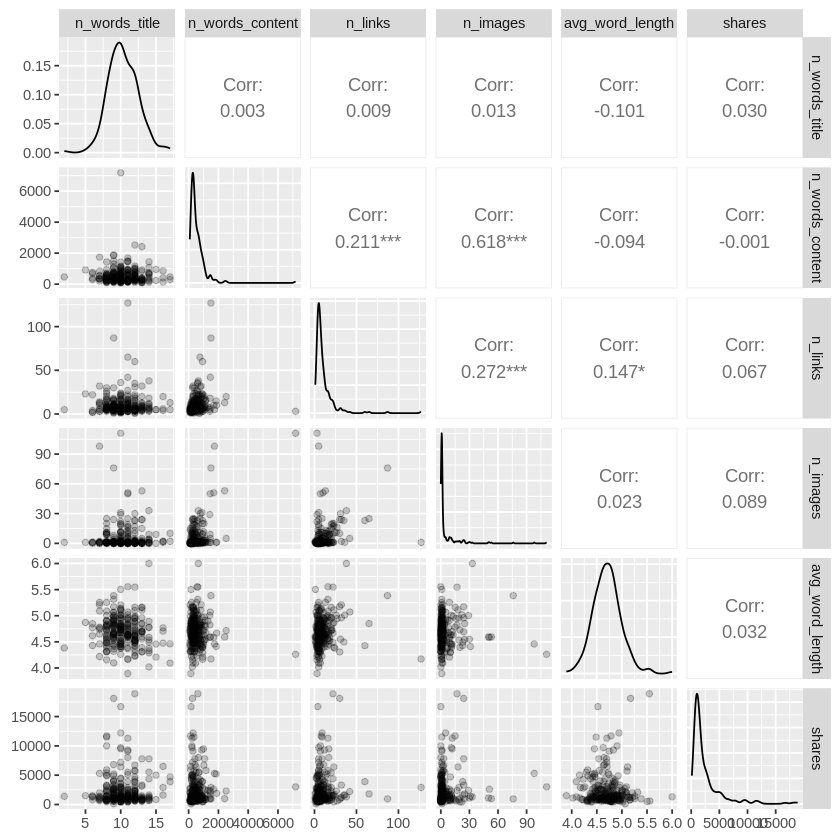

In [15]:
ggpairs(sample_250[,c(1:5, 14)], progress = FALSE,
        lower = list(continuous = wrap("points", alpha = 0.2)))

*Figure 2.1 First subset of correlation matrix*

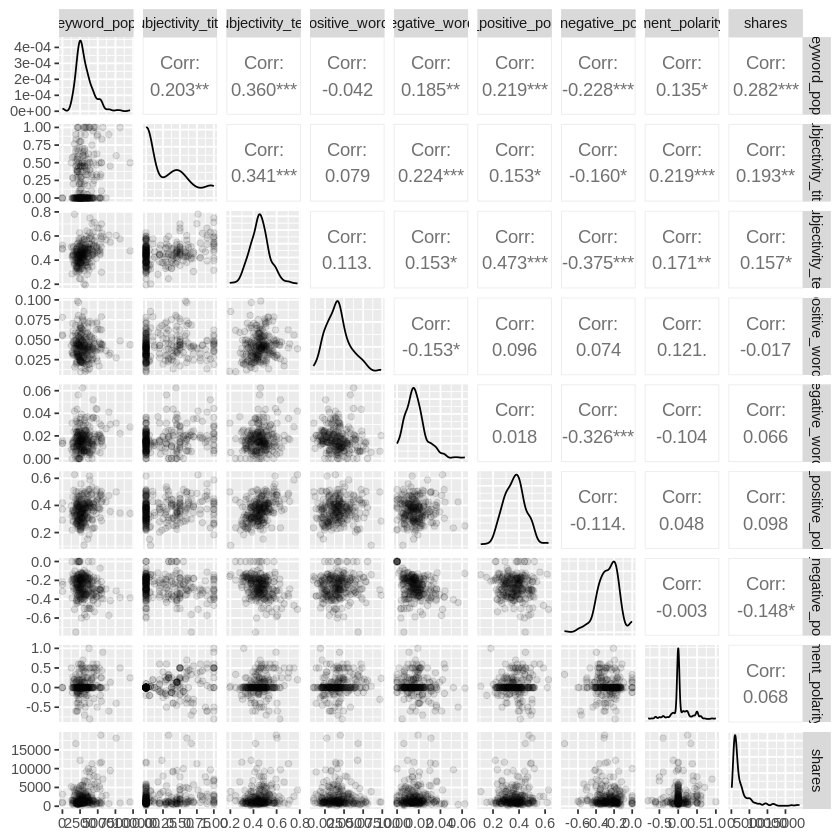

In [16]:
ggpairs(sample_250[,c(6:14)], progress = FALSE,
       lower = list(continuous = wrap("points", alpha = 0.1)))

*Figure 2.2 Second subset of correlation matrix*

### Histogram Plots

We now want to have a look at the distribution of the response variable `shares`. We use geom_histogram to plot the distribution.

Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


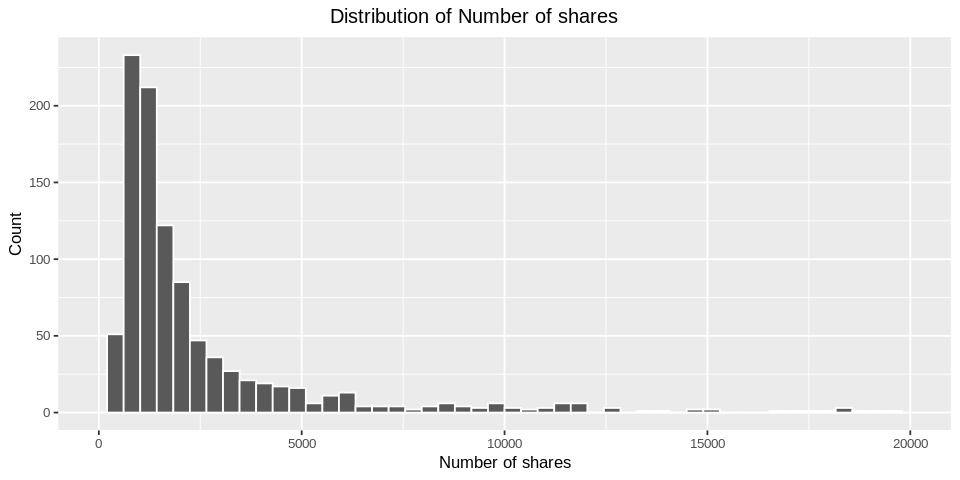

In [17]:
# Sample for correlations
sample_1000 <- news_data_trim %>% sample_n(1000)

options(repr.plot.width = 8, repr.plot.height = 4)
shares_dist <- sample_1000 %>%
    ggplot(aes(x = shares)) +
    geom_histogram(bins = 50, color = "white") +
    xlim(0,20000) +
    labs(x = "Number of shares", y = "Count") +
    ggtitle("Distribution of Number of shares") +
    theme(text = element_text(size = 10)) +
    theme(plot.title = element_text(hjust = 0.45))
shares_dist

*Figure 2.3 Distribution of Number of shares*

This graph shows a right skewed distribution of our interested response variable: number of shares. It is not related to our question but good for us to know what range does the number of shares mainly fall in. We noticed that there are 2 rows removed from this graph, this is because these data points are lied on very right of the hostogram and their count are very low(we have 39644 data points in total). Since our goal is to visualize the distribution of number of shares, we can temporarily ignore them here.

## Model Selection and Prediction

In this project, we want to compare two models: `Ridge Regression` and `Poisson Regression`. Since the response variable in the question is number of shares (count), it might be more reasonable to use Possion Regression. However, we will perform cross-validation to compare two models.

### Splitting Traning data and Testing data

In [18]:
news_data <- news_data %>% relocate(shares)

# Split data into training and test sets
set.seed(123)

training_ONP  = news_data %>%
  sample_frac(0.6)

testing_ONP = news_data %>%
  setdiff(training_ONP)

head(training_ONP,6)
head(testing_ONP,6)

shares n_words_title n_words_content n_links n_images avg_word_length
1 2200   10             767            13      10       4.156454       
2  835   13             263             2       2       4.486692       
3 1500   10            1522            30       6       4.726018       
4  743   12             703            23       1       5.007112       
5  979   10             106             5       0       4.160377       
6 3000   11             358             4       0       4.337989       
  avg_keyword_popularity subjectivity_title subjectivity_text
1 3080.089               1.0000             0.5141252        
2 2262.358               0.4375             0.5551948        
3 1652.077               0.0000             0.3863710        
4 1867.720               0.0000             0.4319106        
5 3021.432               0.0000             0.6555556        
6 2634.475               0.0000             0.5244444        
  rate_positive_words_text rate_negative_words_text avg_positive_polarity
1 0.06518905               0.02216428               0.4187273            
2 0.04562738               0.04562738               0.3332973            
3 0.03022339               0.02036794               0.2671640            
4 0.03271693               0.00568990               0.3342650            
5 0.05660377               0.01886792               0.3166667            
6 0.04469274               0.02234637               0.3822917            
  avg_negative_polarity sentiment_polarity_title
1 -0.1721405             0.50000                
2 -0.6722222            -0.15625                
3 -0.3198477             0.00000                
4 -0.4250000             0.00000                
5 -0.5500000             0.00000                
6 -0.2062500             0.00000

shares n_words_title n_words_content n_links n_images avg_word_length
1  2200   9            1248            11       1       4.617788       
2  1900  10             187             7       1       4.657754       
3   823   9             274            18      11       4.233577       
4 10000   9             285             4       0       4.343860       
5   761   8             259            19       9       5.023166       
6   445  11            1154            20      20       4.629983       
  avg_keyword_popularity subjectivity_title subjectivity_text
1 0                      0.00               0.4820598        
2 0                      0.00               0.4771645        
3 0                      1.00               0.5349500        
4 0                      1.00               0.5097436        
5 0                      0.75               0.2951751        
6 0                      0.00               0.5336576        
  rate_positive_words_text rate_negative_words_text avg_positive_polarity
1 0.03846154               0.02083333               0.4044801            
2 0.02673797               0.01069519               0.4350000            
3 0.05109489               0.02919708               0.3755102            
4 0.02807018               0.05263158               0.4575000            
5 0.01544402               0.01158301               0.2490909            
6 0.07452340               0.01646447               0.4163430            
  avg_negative_polarity sentiment_polarity_title
1 -0.4150641             0.00                   
2 -0.2625000             0.00                   
3 -0.3104167            -1.00                   
4 -0.3378889            -1.00                   
5 -0.1386905             0.55                   
6 -0.2302632             0.00

*Table 2.6 first 6 rows for training set and testing set*

### Building Ridge Regression Model

To train our Ridge Regression model, we will use `glmnet` package, which requires a matrix with input variables and a vector of responses. Thus, we use as.matrix function to prepare the model matrix for glmnet. We create 4 matrix, which are the training x-matrix `ONP_X_train` and training y-matrix `ONP_Y_train`; the testing x-matrix `ONP_X_test` and testing y-matrix `ONP_Y_test`.

In [19]:
# Build matrix and vector required by `glmnet`

ONP_X_train <- model.matrix(object = shares ~ .,
  data = training_ONP)[, -1]

ONP_Y_train <- training_ONP[, "shares"]

ONP_X_test <- model.matrix(object = shares ~ .,
  data = testing_ONP)[, -1]

ONP_Y_test <- testing_ONP[, "shares"]

With the training data `ONP_X_train` and `ONP_Y_train`, we use `cv.glmnet()` function to find an "optimal" value of $\hat{\lambda}$ value for our Ridge model. In `cv.glmnet()` function, we set `alpha = 0` as we want to get a Ridge model. We want to see the results and find the value $\hat{\lambda}_{min}$.

In [20]:
ONP_cv_lambda_ridge <- cv.glmnet(
  x = ONP_X_train, y = ONP_Y_train,
  alpha = 0,
  lambda = exp(seq(-5, 10, 0.1))
)

Now, we will look at the result of cross-validation `ONP_cv_lambda_ridge`

In [21]:
ONP_cv_lambda_ridge


Call:  cv.glmnet(x = ONP_X_train, y = ONP_Y_train, lambda = exp(seq(-5,      10, 0.1)), alpha = 0) 

Measure: Mean-Squared Error 

    Lambda Index   Measure       SE Nonzero
min   1097    31 117547311 32584411      13
1se  22026     1 118120641 32657575      13

We can see that $\hat{\lambda}_{\text{1SE}}$ here is very large, which slightly implies that Ridge Regression might not be very suitable for our data. However, we will use $\hat{\lambda}_{min}$ to build our Ridge Model and name it `ONP_cv_lambda_ridge`.

In [22]:
ONP_cv_lambda_ridge <- glmnet(
  x = ONP_X_train, y = ONP_Y_train,
  alpha = 0,
  lambda = ONP_cv_lambda_ridge$lambda.min
)

### Building Poisson Regression Model

The reason we build Poisson Regression Model is because a Poisson random variable takes discrete non-negative integer values that count something in a given timeframe. Our dataset has number of shares as response variable which is also a discrete non-negative varible counting the number of shares in a period of 2 years. This characteristic of our response variable meets all the traits of a poisson random variable.

In order to fit a Poisson regression model, we can use the function `glm()` and its argument `family = poisson`, which obtains the estimates $\hat{\beta}_0, \hat{\beta}_1, \dots \hat{\beta}_{p}$. The estimates are obtained through maximum likelihood where we assume a Poisson joint probability mass function of the $n$ responses $Y_i$.

Here we use `shares` as response variable and all other variables as explanatory variables to build a Poisson regression model, name it `ONP_Poisson_model`. 

In [23]:
ONP_Poisson_model <- glm(
  formula = shares ~.,
  data = training_ONP,
  family = poisson
)
summary(ONP_Poisson_model)


Call:
glm(formula = shares ~ ., family = poisson, data = training_ONP)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-583.35   -45.65   -32.02    -8.02  2389.08  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               7.559e+00  2.370e-03  3189.6   <2e-16 ***
n_words_title             1.151e-02  5.450e-05   211.2   <2e-16 ***
n_words_content           4.686e-05  2.600e-07   180.2   <2e-16 ***
n_links                   5.436e-03  9.456e-06   574.9   <2e-16 ***
n_images                  4.769e-03  1.312e-05   363.5   <2e-16 ***
avg_word_length          -1.722e-01  4.284e-04  -402.0   <2e-16 ***
avg_keyword_popularity    1.066e-04  3.582e-08  2977.5   <2e-16 ***
subjectivity_title        1.001e-01  3.588e-04   278.8   <2e-16 ***
subjectivity_text         1.265e+00  1.536e-03   824.0   <2e-16 ***
rate_positive_words_text -1.084e+00  7.671e-03  -141.3   <2e-16 ***
rate_negative_words_text -1.366e+00  1.135e-02  -12

### Model Comparison

To select the best model for the dataset to predict number of shares, we use `caret` package with `glmnet` to perform a 10-fold CV for comparing models. Below is the specific code:

In [ ]:
# Step 1: Prepare data
predictors <- subset(training_ONP, select = -c(shares)) # Features
target <- training_ONP$shares # Target variable

# Step 2: Create the models (Ridge regression and Poisson regression)
# Ridge regression using glmnet package
model_ridge <- train(predictors, target, method = "glmnet", 
                     trControl = trainControl(method = "cv", number = 10),
                     tuneGrid = expand.grid(alpha = 0, lambda = seq(-5, 10, by = 0.1)), 
                     family = "gaussian")

# Poisson regression using glm package
model_poisson <- train(predictors, target, method = "glm", 
                       trControl = trainControl(method = "cv", number = 10),
                       tuneLength = 5,
                       family = poisson())

# Step 3: Perform cross-validation to compare models
compareModels <- resamples(list(Ridge = model_ridge, Poisson = model_poisson))

# Summarize and compare the performance of models
summary(compareModels)

From the summary above, $MAE$, $RMSE$, and $R^2$ values are calculated for both models. We will focus on analyzing the mean for each metrics for both models. We can see that the $MAE$ for Ridge Regression Model is slightly lower than($\approx$ 1) $MAE$ of Poisson Regression Model. The $RMSE$ for Ridge Regression Model is a lot higher than ($\approx$ 3687) $RMSE$ of Poisson Regression Model. The $R^2$ for Ridge Regression Model is slightly higher than($\approx$ 0.002) $R^2$ of Poisson Regression Model. Since the $MAE$ and $R^2$ metric values for both models are about the same whereas the $RMSE$ of Poisson Regression Model is much less than that of Ridge Regression Model, **we can conclude that Poisson Regression Model is better for us to use to predict number of shares in a period of 2 years.**

### Prediction

We use `predict()` function and the Poisson regression model `ONP_Poisson_model` to obtain the out-of-sample predicted values of number of shares of an article in a period of two years using testing set `testing_ONP`. We store the predicted values in a variable called `test_pred_poisson`. We will look at the first few predicted value using `head()` function.

In [ ]:
test_pred_poisson <- predict(ONP_Poisson_model, newdata = testing_ONP,
                             type = "response")
head(test_pred_poisson)

Use the function `rmse()` to compute the  RMSE$_{test}$ using the predicted values stored in `test_pred_poisson`.

In [ ]:
ONP_R_MSE_models <- tibble(
  Model = "Poisson Regression",
  R_MSE = rmse(
    preds = test_pred_poisson,
    actuals = testing_ONP$shares
  )
)
ONP_R_MSE_models

*Table 2.7 RMSE of predicted values by Poisson Regression*

The RMSE value above indicates that the average difference between the number of shares predicted by Poisson model and the actual number of shares is 12192.38. 